In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_0 = 0  # initial data
x_n = 10
n = 10

In [3]:
def f(x):
    return np.exp(np.sin(x/5)**2) * np.cos(x/5)**2

In [4]:
def lagr_pol(x, nodes):
    return np.sum([f(x_i) * np.prod([(x - x_j)/(x_i - x_j) for x_j in nodes if x_j != x_i])
                   for x_i in nodes])

In [5]:
def compare_plot(nodes,figsize=(10,8), c = 'g', title = ''):
    x_star = [(nodes[i] + nodes[i+1]) / 2 for i in range(0,len(nodes)-1)]
    pred_v = [lagr_pol(x_i,nodes) for x_i in x_star]
    xx = np.linspace(x_0,x_n,100)
    yy_true = [f(x_i) for x_i in xx]
    
    plt.figure(figsize=(10,8))
    plt.plot(xx, yy_true, c=c, label="y = f(x)")
#     plt.plot(xx, [lagr_pol(x_i,nodes) for x_i in xx])
    plt.plot(x_star, pred_v, 'b*', label='Pred y values', ms = 10)
    plt.legend()
    plt.xticks(x_star)
    plt.title(title)
    plt.show()

### First, using uniform nodes

In [6]:
uniform_nodes = np.linspace(x_0, x_n, endpoint=True, num = n )


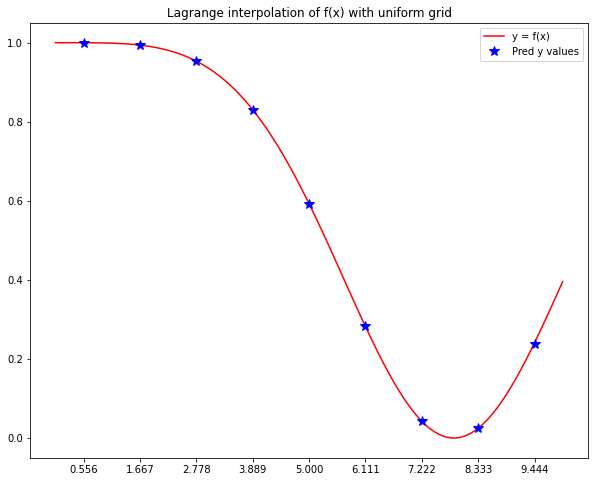

In [7]:
compare_plot(uniform_nodes,c='r', title='Lagrange interpolation of f(x) with uniform grid')

### Now with Chebyshev nodes

In [8]:
cheb_nodes = sorted([1/2 * (x_0 + x_n) + 1/2 * (x_n - x_0) *
                     np.cos((2 * k-1)/(2*n) * np.pi) for k in range(1,n+1)])


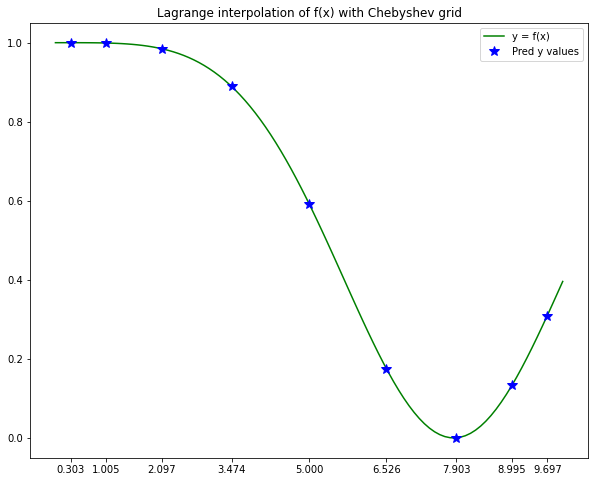

In [9]:
compare_plot(cheb_nodes, title='Lagrange interpolation of f(x) with Chebyshev grid')

### Plotting errors

In [35]:
def compare_errors_plot():
    x = np.linspace(x_0,x_n,100)
    x_star = [(x[i] + x[i+1]) / 2 for i in range(0,len(x)-1)]
    unif_nodes_errors = [abs(lagr_pol(x_i, uniform_nodes) - f(x_i)) for x_i in x_star]
    cheb_nodes_errors = [abs(lagr_pol(x_i, cheb_nodes) - f(x_i)) for x_i in x_star]
    
    plt.figure(figsize=(10,6))
    plt.plot(x_star,unif_nodes_errors,c='b',label='Uniform nodes errors')
    plt.plot(x_star,cheb_nodes_errors,c='r', label='Chebyshev nodes errors')
    plt.legend()


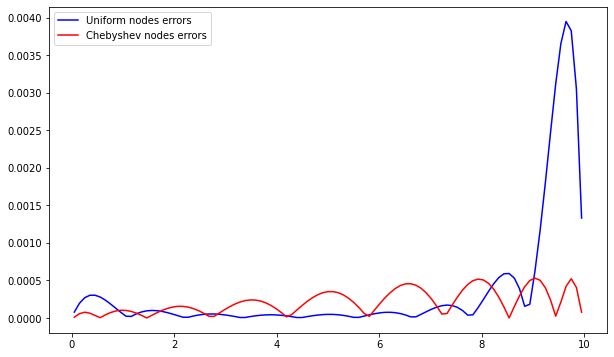

In [36]:
compare_errors_plot()